In [1]:
import numpy as np
import scipy as sc
import pylab as plt
#import urllib2
from astropy.io import fits
from astropy.io import ascii
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import umath, unumpy, ufloat
import pickle

In [2]:
df = pd.read_csv('measurement_emission_lines.tsv', delimiter='\t')

In [3]:
df

,ID,ID_MASK,H_BETA_FLUX,H_BETA_FLUX_ERR,OIII_5007_FLUX,OIII_5007_FLUX_ERR,H_ALPHA_FLUX,H_ALPHA_FLUX_ERR,NII_6584_FLUX,NII_6584_FLUX_ERR,...,H_ALPHA_EQW,H_ALPHA_EQW_ERR,NII_6584_EQW,NII_6584_EQW_ERR,SII_6716_EQW,SII_6716_EQW_ERR,SII_6731_EQW,SII_6731_EQW_ERR,OI_6300_EQW,OI_6300_EQW_ERR
0,1,1.0,88.649703,2.494409,491.180987,18.179230,280.129860,2.023057,7.743517,1.981513,...,1962.937391,47.764972,54.260690,13.942068,52.309471,1.370111,40.210512,1.102443,NaN,NaN
1,3,3.0,17.124042,0.715287,85.307068,4.093336,49.981168,0.499074,1.743826,0.496582,...,1353.391804,99.933046,47.219375,13.883154,58.220179,3.459596,43.266121,2.589861,NaN,NaN
2,7,11.0,13.285319,0.569428,39.242761,1.641625,41.935169,0.387233,2.737472,0.365154,...,731.682492,25.184646,47.763263,6.565090,50.535306,2.394105,32.181641,1.811442,NaN,NaN
3,9,13.0,31.443495,0.851705,136.057021,4.998214,90.248278,1.855688,3.666542,2.079991,...,1647.440633,76.275572,66.931028,38.070655,65.184500,2.173401,49.880845,1.700162,NaN,NaN
4,11,15.0,47.815526,1.320968,126.005902,3.462590,154.922381,3.912832,8.313916,3.293033,...,1197.267807,48.954887,64.251425,25.532872,61.256974,1.358503,46.585428,1.070859,NaN,NaN
5,17,21.0,11.200002,0.338545,29.903199,0.932408,32.582814,0.354138,2.045656,0.338013,...,860.372503,41.742999,54.017016,9.283738,56.929337,2.325698,40.186171,1.726424,NaN,NaN
6,19,23.0,7.826941,0.425261,33.937198,1.141636,23.027740,0.139001,0.780821,0.134871,...,524.328225,51.168775,17.778840,3.525542,18.597232,0.671316,13.113672,0.491633,NaN,NaN
7,21,25.0,9.668545,0.342895,16.502650,0.731022,33.871394,0.833682,2.506446,0.678030,...,387.848656,21.855627,28.700375,7.898999,29.121837,1.299932,22.782049,1.061694,NaN,NaN
8,#LiMe:1.0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,#u_wave:Angstrom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(index=[8,9,10,11,12])

In [5]:
df

,ID,ID_MASK,H_BETA_FLUX,H_BETA_FLUX_ERR,OIII_5007_FLUX,OIII_5007_FLUX_ERR,H_ALPHA_FLUX,H_ALPHA_FLUX_ERR,NII_6584_FLUX,NII_6584_FLUX_ERR,...,H_ALPHA_EQW,H_ALPHA_EQW_ERR,NII_6584_EQW,NII_6584_EQW_ERR,SII_6716_EQW,SII_6716_EQW_ERR,SII_6731_EQW,SII_6731_EQW_ERR,OI_6300_EQW,OI_6300_EQW_ERR
0,1,1.0,88.649703,2.494409,491.180987,18.179230,280.129860,2.023057,7.743517,1.981513,...,1962.937391,47.764972,54.260690,13.942068,52.309471,1.370111,40.210512,1.102443,NaN,NaN
1,3,3.0,17.124042,0.715287,85.307068,4.093336,49.981168,0.499074,1.743826,0.496582,...,1353.391804,99.933046,47.219375,13.883154,58.220179,3.459596,43.266121,2.589861,NaN,NaN
2,7,11.0,13.285319,0.569428,39.242761,1.641625,41.935169,0.387233,2.737472,0.365154,...,731.682492,25.184646,47.763263,6.565090,50.535306,2.394105,32.181641,1.811442,NaN,NaN
3,9,13.0,31.443495,0.851705,136.057021,4.998214,90.248278,1.855688,3.666542,2.079991,...,1647.440633,76.275572,66.931028,38.070655,65.184500,2.173401,49.880845,1.700162,NaN,NaN
4,11,15.0,47.815526,1.320968,126.005902,3.462590,154.922381,3.912832,8.313916,3.293033,...,1197.267807,48.954887,64.251425,25.532872,61.256974,1.358503,46.585428,1.070859,NaN,NaN
5,17,21.0,11.200002,0.338545,29.903199,0.932408,32.582814,0.354138,2.045656,0.338013,...,860.372503,41.742999,54.017016,9.283738,56.929337,2.325698,40.186171,1.726424,NaN,NaN
6,19,23.0,7.826941,0.425261,33.937198,1.141636,23.027740,0.139001,0.780821,0.134871,...,524.328225,51.168775,17.778840,3.525542,18.597232,0.671316,13.113672,0.491633,NaN,NaN
7,21,25.0,9.668545,0.342895,16.502650,0.731022,33.871394,0.833682,2.506446,0.678030,...,387.848656,21.855627,28.700375,7.898999,29.121837,1.299932,22.782049,1.061694,NaN,NaN


<Axes: xlabel='H_ALPHA_FLUX', ylabel='H_ALPHA_FLUX'>

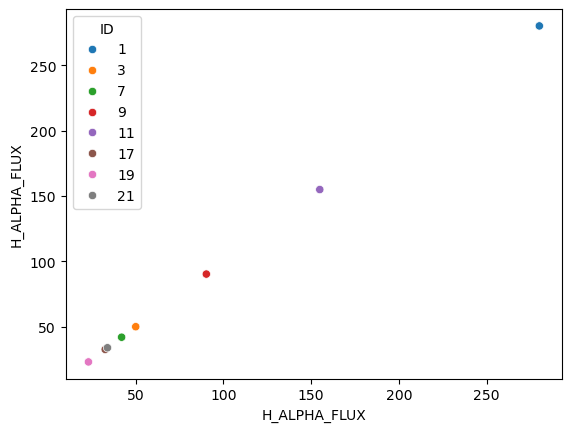

In [6]:
sns.scatterplot(x=df['H_ALPHA_FLUX'],y=df['H_ALPHA_FLUX'],hue=df['ID'])

In [7]:
#FITS = fits.open('gal_line_dr7_v5_2.fit.gz')  # Read the compress data

#head      = FITS[1].data
#infheader = head.columns

# If you need 



Hbeta  = df['H_BETA_FLUX']          # Reading the column with Hbeta line 
OIII   = df['OIII_5007_FLUX']       # Reading the column with OIII line
Halpha = df['H_ALPHA_FLUX']         # Reading the column with Halpha line
NII    = df['NII_6584_FLUX']        # Reading the column with NII line
SII_6716 = df['SII_6716_FLUX']      # Reading the column with SII 6716 A line 
SII_6731 = df['SII_6731_FLUX']      # Reading the column with SII 6731 A line

In [8]:
#Hbeta_un = ufloat(df['H_BETA_FLUX'],df['H_BETA_FLUX_ERR'])
#Hbeta_un

In [9]:
lista_Ha_flux = []
lista_Hb_flux = []
lista_OIII_flux = []
lista_NII_flux = []
lista_SII_6716_flux = []
lista_SII_6731_flux = []
lista_OI_flux = []

lista_Ha_eqw = []
lista_Hb_eqw = []
lista_OIII_eqw = []
lista_NII_eqw = []
lista_SII_6716_eqw = []
lista_SII_6731_eqw = []
lista_OI_eqw = []

for i in range(len(df["ID"])):
    Ha_flux = ufloat(df['H_ALPHA_FLUX'][i],df['H_ALPHA_FLUX_ERR'][i])
    Hb_flux = ufloat(df['H_BETA_FLUX'][i],df['H_BETA_FLUX_ERR'][i])
    OIII_flux = ufloat(df['OIII_5007_FLUX'][i],df['OIII_5007_FLUX_ERR'][i])
    NII_flux = ufloat(df['NII_6584_FLUX'][i],df['NII_6584_FLUX_ERR'][i])
    SII_6716_flux = ufloat(df['SII_6716_FLUX'][i],df['SII_6716_FLUX_ERR'][i])
    SII_6731_flux = ufloat(df['SII_6731_FLUX'][i],df['SII_6731_FLUX_ERR'][i])
    OI_flux = ufloat(df['OI_6300_FLUX'][i],df['OI_6300_FLUX_ERR'][i])
    Ha_eqw = ufloat(df['H_ALPHA_EQW'][i],df['H_ALPHA_EQW_ERR'][i])
    Hb_eqw = ufloat(df['H_BETA_EQW'][i],df['H_BETA_EQW_ERR'][i])
    OIII_eqw = ufloat(df['OIII_5007_EQW'][i],df['OIII_5007_EQW_ERR'][i])
    NII_eqw = ufloat(df['NII_6584_EQW'][i],df['NII_6584_EQW_ERR'][i])
    SII_6716_eqw = ufloat(df['SII_6716_EQW'][i],df['SII_6716_EQW_ERR'][i])
    SII_6731_eqw = ufloat(df['SII_6731_EQW'][i],df['SII_6731_EQW_ERR'][i])
    OI_eqw = ufloat(df['OI_6300_EQW'][i],df['OI_6300_EQW_ERR'][i])
    
    lista_Ha_flux.append(Ha_flux)
    lista_Hb_flux.append(Hb_flux)
    lista_OIII_flux.append(OIII_flux)
    lista_NII_flux.append(NII_flux)
    lista_SII_6716_flux.append(SII_6716_flux)
    lista_SII_6731_flux.append(SII_6731_flux)
    lista_OI_flux.append(OI_flux)
    lista_Ha_eqw.append(Ha_eqw)
    lista_Hb_eqw.append(Hb_eqw)
    lista_OIII_eqw.append(OIII_eqw)
    lista_NII_eqw.append(NII_eqw)
    lista_SII_6716_eqw.append(SII_6716_eqw)
    lista_SII_6731_eqw.append(SII_6731_eqw)
    lista_OI_eqw.append(OI_eqw)
    print(f"vamos en el slit: {df['ID'][i]}")

vamos en el slit: 1
vamos en el slit: 3
vamos en el slit: 7
vamos en el slit: 9
vamos en el slit: 11
vamos en el slit: 17
vamos en el slit: 19
vamos en el slit: 21


In [10]:
lista_Hb_flux

[88.649703+/-2.494409,
 17.124042+/-0.715287,
 13.285319+/-0.569428,
 31.443495+/-0.851705,
 47.815526+/-1.320968,
 11.200002+/-0.338545,
 7.826941+/-0.425261,
 9.668545+/-0.342895]

In [11]:
SII = []
for i in range(len(df['ID'])):
    SII_sum = ufloat(df['SII_6716_FLUX'][i], df['SII_6716_FLUX_ERR'][i]) + ufloat(df['SII_6731_FLUX'][i],df['SII_6731_FLUX_ERR'][i])
    SII.append(SII_sum)

In [12]:
SII

[12.357029+/-0.14132181113483366,
 3.6293180000000005+/-0.03632856303208262,
 4.397439+/-0.1299300662394967,
 5.864355+/-0.05474893001694189,
 12.954146+/-0.1160963909215097,
 3.154089+/-0.04879254128450372,
 1.321842+/-0.014867012914503035,
 4.0133469999999996+/-0.08060748618459702]

In [13]:
df['H_ALPHA_FLUX'], df['H_ALPHA_FLUX_ERR']

(0    280.129860
 1     49.981168
 2     41.935169
 3     90.248278
 4    154.922381
 5     32.582814
 6     23.027740
 7     33.871394
 Name: H_ALPHA_FLUX, dtype: float64,
 0    2.023057
 1    0.499074
 2    0.387233
 3    1.855688
 4    3.912832
 5    0.354138
 6    0.139001
 7    0.833682
 Name: H_ALPHA_FLUX_ERR, dtype: float64)

In [14]:
lista_Ha_flux

[280.12986+/-2.023057,
 49.981168+/-0.4990741,
 41.935169+/-0.387233,
 90.248278+/-1.855688,
 154.922381+/-3.912832,
 32.582814+/-0.354138,
 23.02774+/-0.139001,
 33.871394+/-0.833682]

In [18]:
SII_arr = np.array(SII)
Ha_arr = np.array(lista_Ha_flux)
SII_arr, Ha_arr

(array([12.357029+/-0.14132181113483366,
        3.6293180000000005+/-0.03632856303208262,
        4.397439+/-0.1299300662394967, 5.864355+/-0.05474893001694189,
        12.954146+/-0.1160963909215097, 3.154089+/-0.04879254128450372,
        1.321842+/-0.014867012914503035,
        4.0133469999999996+/-0.08060748618459702], dtype=object),
 array([280.12986+/-2.023057, 49.981168+/-0.4990741, 41.935169+/-0.387233,
        90.248278+/-1.855688, 154.922381+/-3.912832, 32.582814+/-0.354138,
        23.02774+/-0.139001, 33.871394+/-0.833682], dtype=object))

In [21]:
ratio_SII_Ha_1 = ufloat(12.357029,0.14132181113483366) / ufloat(280.12986,2.023057)
ratio_SII_Ha_3 = ufloat(3.6293180000000005,0.03632856303208262) / 
ratio_SII_Ha_7
ratio_SII_Ha_9
ratio_SII_Ha_11
ratio_SII_Ha_17
ratio_SII_Ha_19
ratio_SII_Ha_21

0.04411178801146012+/-0.0005966515364127593

In [51]:
df['SII_6716_FLUX'], df['SII_6716_FLUX_ERR'], df['SII_6731_FLUX'], df['SII_6731_FLUX_ERR']

(0   6.986487
 1   2.082050
 2   2.686583
 3   3.322156
 4   7.358254
 5   1.848934
 6   0.775210
 7   2.251778
 Name: SII_6716_FLUX, dtype: float64,
 0   0.106601
 1   0.027748
 2   0.100433
 3   0.041067
 4   0.088396
 5   0.037257
 6   0.011277
 7   0.060710
 Name: SII_6716_FLUX_ERR, dtype: float64,
 0   5.370542
 1   1.547268
 2   1.710856
 3   2.542199
 4   5.595892
 5   1.305155
 6   0.546632
 7   1.761569
 Name: SII_6731_FLUX, dtype: float64,
 0   0.092780
 1   0.023448
 2   0.082432
 3   0.036207
 4   0.075263
 5   0.031506
 6   0.009688
 7   0.053027
 Name: SII_6731_FLUX_ERR, dtype: float64)

In [56]:
SII

[12.357029+/-0.14132181113483366,
 3.6293180000000005+/-0.03632856303208262,
 4.397439+/-0.1299300662394967,
 5.864355+/-0.05474893001694189,
 12.954146+/-0.1160963909215097,
 3.154089+/-0.04879254128450372,
 1.321842+/-0.014867012914503035,
 4.0133469999999996+/-0.08060748618459702]

In [52]:
df['SII_SUM_UN'] = SII

In [54]:
df['SII_SUM_UN']

0     12.36+/-0.14
1      3.63+/-0.04
2      4.40+/-0.13
3      5.86+/-0.05
4     12.95+/-0.12
5      3.15+/-0.05
6    1.322+/-0.015
7      4.01+/-0.08
Name: SII_SUM_UN, dtype: object

In [35]:
df['H_BETA_FLUX_UN'] = list(lista_Hb_flux)

In [36]:
df.keys()

Index(['ID', 'ID_MASK', 'H_BETA_FLUX', 'H_BETA_FLUX_ERR', 'OIII_5007_FLUX',
       'OIII_5007_FLUX_ERR', 'H_ALPHA_FLUX', 'H_ALPHA_FLUX_ERR',
       'NII_6584_FLUX', 'NII_6584_FLUX_ERR', 'SII_6716_FLUX',
       'SII_6716_FLUX_ERR', 'SII_6731_FLUX', 'SII_6731_FLUX_ERR',
       'OI_6300_FLUX', 'OI_6300_FLUX_ERR', 'H_BETA_EQW', 'H_BETA_EQW_ERR',
       'OIII_5007_EQW', 'OIII_5007_EQW_ERR', 'H_ALPHA_EQW', 'H_ALPHA_EQW_ERR',
       'NII_6584_EQW', 'NII_6584_EQW_ERR', 'SII_6716_EQW', 'SII_6716_EQW_ERR',
       'SII_6731_EQW', 'SII_6731_EQW_ERR', 'OI_6300_EQW', 'OI_6300_EQW_ERR',
       'H_BETA_FLUX_UN'],
      dtype='object')

In [37]:
df['H_BETA_FLUX_UN']

0      88.6+/-2.5
1      17.1+/-0.7
2      13.3+/-0.6
3      31.4+/-0.9
4      47.8+/-1.3
5    11.20+/-0.34
6       7.8+/-0.4
7     9.67+/-0.34
Name: H_BETA_FLUX_UN, dtype: object

In [20]:
df.to_pickle('test.pkl')
#df_open = pd.read_pickle("measuresbla.pkl")

In [21]:
df_open = pd.read_pickle("test.pkl")
df_open

,ID,ID_MASK,H_BETA_FLUX,H_BETA_FLUX_ERR,OIII_5007_FLUX,OIII_5007_FLUX_ERR,H_ALPHA_FLUX,H_ALPHA_FLUX_ERR,NII_6584_FLUX,NII_6584_FLUX_ERR,...,H_ALPHA_EQW_ERR,NII_6584_EQW,NII_6584_EQW_ERR,SII_6716_EQW,SII_6716_EQW_ERR,SII_6731_EQW,SII_6731_EQW_ERR,OI_6300_EQW,OI_6300_EQW_ERR,H_BETA_FLUX_UN
0,1,1.000000,88.649703,2.494409,491.180987,18.179230,280.129860,2.023057,7.743517,1.981513,...,47.764972,54.260690,13.942068,52.309471,1.370111,40.210512,1.102443,NaN,NaN,88.6+/-2.5
1,3,3.000000,17.124042,0.715287,85.307068,4.093336,49.981168,0.499074,1.743826,0.496582,...,99.933046,47.219375,13.883154,58.220179,3.459596,43.266121,2.589861,NaN,NaN,17.1+/-0.7
2,7,11.000000,13.285319,0.569428,39.242761,1.641625,41.935169,0.387233,2.737472,0.365154,...,25.184646,47.763263,6.565090,50.535306,2.394105,32.181641,1.811442,NaN,NaN,13.3+/-0.6
3,9,13.000000,31.443495,0.851705,136.057021,4.998214,90.248278,1.855688,3.666542,2.079991,...,76.275572,66.931028,38.070655,65.184500,2.173401,49.880845,1.700162,NaN,NaN,31.4+/-0.9
4,11,15.000000,47.815526,1.320968,126.005902,3.462590,154.922381,3.912832,8.313916,3.293033,...,48.954887,64.251425,25.532872,61.256974,1.358503,46.585428,1.070859,NaN,NaN,47.8+/-1.3
5,17,21.000000,11.200002,0.338545,29.903199,0.932408,32.582814,0.354138,2.045656,0.338013,...,41.742999,54.017016,9.283738,56.929337,2.325698,40.186171,1.726424,NaN,NaN,11.20+/-0.34
6,19,23.000000,7.826941,0.425261,33.937198,1.141636,23.027740,0.139001,0.780821,0.134871,...,51.168775,17.778840,3.525542,18.597232,0.671316,13.113672,0.491633,NaN,NaN,7.8+/-0.4
7,21,25.000000,9.668545,0.342895,16.502650,0.731022,33.871394,0.833682,2.506446,0.678030,...,21.855627,28.700375,7.898999,29.121837,1.299932,22.782049,1.061694,NaN,NaN,9.67+/-0.34


In [ ]:
lista_NII_Ha_flux = []
lista_OIII_Hb_flux = []
lista__flux = []
lista_NII_flux = []
lista_SII_6716_flux = []
lista_SII_6731_flux = []
lista_OI_flux = []

lista_Ha_eqw = []
lista_Hb_eqw = []
lista_OIII_eqw = []
lista_NII_eqw = []
lista_SII_6716_eqw = []
lista_SII_6731_eqw = []
lista_OI_eqw = []

for i in range(len(df["ID"])):
    Ha_flux = ufloat(df['H_ALPHA_FLUX'][i],df['H_ALPHA_FLUX_ERR'][i])
    Hb_flux = ufloat(df['H_BETA_FLUX'][i],df['H_BETA_FLUX_ERR'][i])
    OIII_flux = ufloat(df['OIII_5007_FLUX'][i],df['OIII_5007_FLUX_ERR'][i])
    NII_flux = ufloat(df['NII_6584_FLUX'][i],df['NII_6584_FLUX_ERR'][i])
    SII_6716_flux = ufloat(df['SII_6716_FLUX'][i],df['SII_6716_FLUX_ERR'][i])
    SII_6731_flux = ufloat(df['SII_6731_FLUX'][i],df['SII_6731_FLUX_ERR'][i])
    OI_flux = ufloat(df['OI_6300_FLUX'][i],df['OI_6300_FLUX_ERR'][i])
    Ha_eqw = ufloat(df['H_ALPHA_EQW'][i],df['H_ALPHA_EQW_ERR'][i])
    Hb_eqw = ufloat(df['H_BETA_EQW'][i],df['H_BETA_EQW_ERR'][i])
    OIII_eqw = ufloat(df['OIII_5007_EQW'][i],df['OIII_5007_EQW_ERR'][i])
    NII_eqw = ufloat(df['NII_6584_EQW'][i],df['NII_6584_EQW_ERR'][i])
    SII_6716_eqw = ufloat(df['SII_6716_EQW'][i],df['SII_6716_EQW_ERR'][i])
    SII_6731_eqw = ufloat(df['SII_6731_EQW'][i],df['SII_6731_EQW_ERR'][i])
    OI_eqw = ufloat(df['OI_6300_EQW'][i],df['OI_6300_EQW_ERR'][i])
    
    lista_Ha_flux.append(Ha_flux)
    lista_Hb_flux.append(Hb_flux)
    lista_OIII_flux.append(OIII_flux)
    lista_NII_flux.append(NII_flux)
    lista_SII_6716_flux.append(SII_6716_flux)
    lista_SII_6731_flux.append(SII_6731_flux)
    lista_OI_flux.append(OI_flux)
    lista_Ha_eqw.append(Ha_eqw)
    lista_Hb_eqw.append(Hb_eqw)
    lista_OIII_eqw.append(OIII_eqw)
    lista_NII_eqw.append(NII_eqw)
    lista_SII_6716_eqw.append(SII_6716_eqw)
    lista_SII_6731_eqw.append(SII_6731_eqw)
    lista_OI_eqw.append(OI_eqw)
    print(f"vamos en el slit: {df['ID'][i]}")

In [14]:
log_NII_Ha = np.linspace(-2.5, 0.3, 100)
log_NII_Ha_Kauffman = np.linspace(-2.5, 0., 100)

log_SII_Ha = np.linspace(-2, 0.3, 100)
log_SII_Ha_kewley = np.linspace(-0.32, 1.2, 100)

log_OI_Ha = np.linspace(-2.5, -0.7, 100)
log_OI_Ha_kewley06 = np.linspace(-1.13, 2.0, 100)

# Ecuaciones para las curvas de Kewley et al. (2001) y las separaciones de Seyfert y LINERs (Kewley 2006) y Kauffmann et al. (2003)
log_OIII_Hb_Kewley = 0.61 / (log_NII_Ha - 0.47) + 1.19 #Kewley+01
log_OIII_Hb_Kauffmann = 0.61 / (log_NII_Ha_Kauffman - 0.05) + 1.30 #Kauffman+03

log_OIII_Hb_SII_Kewley = 0.72 / (log_SII_Ha - 0.32) + 1.30 #Kewley
log_OIII_Hb_SII_Seyfert_LINER = (1.89 * log_SII_Ha_kewley) + 0.76 #Kewley2006

log_OIII_Hb_OI_Kewley = 0.73 / (log_OI_Ha + 0.59) + 1.33 #kewley
log_OIII_Hb_OI_Seyfert_LINER = (1.18 * log_OI_Ha_kewley06) + 1.30 #kewley+06

In [10]:
ratio_NII_Ha = np.log10(df['NII_6584_FLUX']/df['H_ALPHA_FLUX'])
ratio_OIII_Hb = np.log10(df['OIII_5007_FLUX']/df['H_BETA_FLUX'])
ratio_SII_Ha = np.log10(SII/df['H_ALPHA_FLUX']) 
ratio_OI_Ha = np.log10(df['OI_6300_FLUX']/df['H_ALPHA_FLUX'])

#ratio_NII_Ha = np.log10(df['NII_6584_FLUX']) - np.log10(df['H_ALPHA_FLUX'])
#ratio_OIII_Hb = np.log10(df['OIII_5007_FLUX']) - np.log10(df['H_BETA_FLUX'])
#ratio_SII_Ha = np.log10(SII) - np.log10(df['H_ALPHA_FLUX']) 

In [11]:
ratio_NII_Ha

0   -1.558421
1   -1.457303
2   -1.185229
3   -1.391182
4   -1.270309
5   -1.202156
6   -1.469700
7   -1.130775
dtype: float64

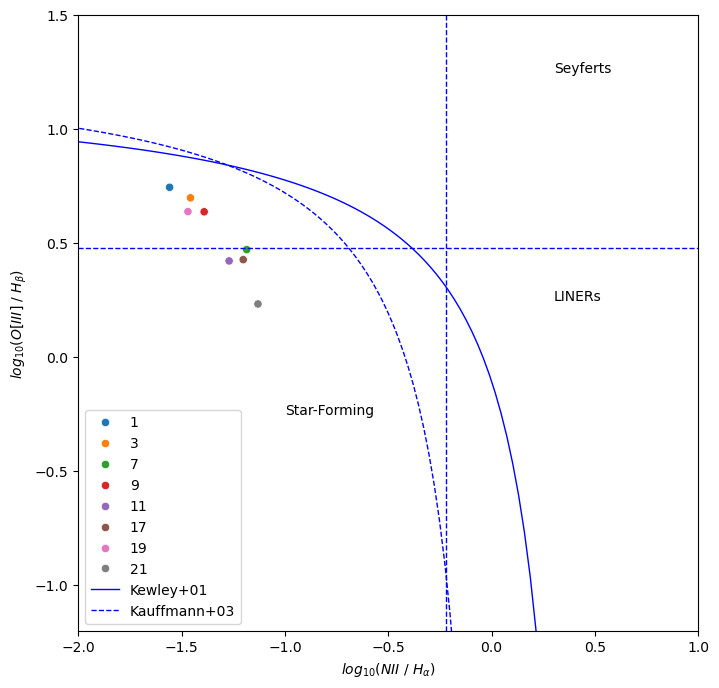

In [17]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=ratio_NII_Ha,y=ratio_OIII_Hb,hue=df['ID'])
plt.plot(log_NII_Ha,   log_OIII_Hb_Kewley, '-' , color='blue', lw=1, label='Kewley+01')
plt.plot(log_NII_Ha_Kauffman, log_OIII_Hb_Kauffmann, '--', color='blue', lw=1, label='Kauffmann+03')
plt.ylim(-1.2,1.5)
plt.xlim(-2,1)
plt.axhline(y=np.log10(3), linestyle='--', color='blue', lw=1)
plt.axvline(x=np.log10(0.6), linestyle='--', color='blue', lw=1)
plt.text(s='Star-Forming', x=-1.0, y=-0.25, fontsize=10)
plt.text(s='Seyferts', x=0.3, y=1.25, fontsize=10)
plt.text(s='LINERs', x=0.3, y=0.25, fontsize=10)
#plt.errorbar(x=ratio_NII_Ha,y=ratio_OIII_Hb)
plt.xlabel('$log_{10}$($NII$ / $ H_{\\alpha}$)')
plt.ylabel('$log_{10}$($O[III]$ / $ H_{\\beta}$)')
plt.errorbar()
plt.legend(loc='lower left')
#alpha 0.2 más clara, 1 default, es opacidad

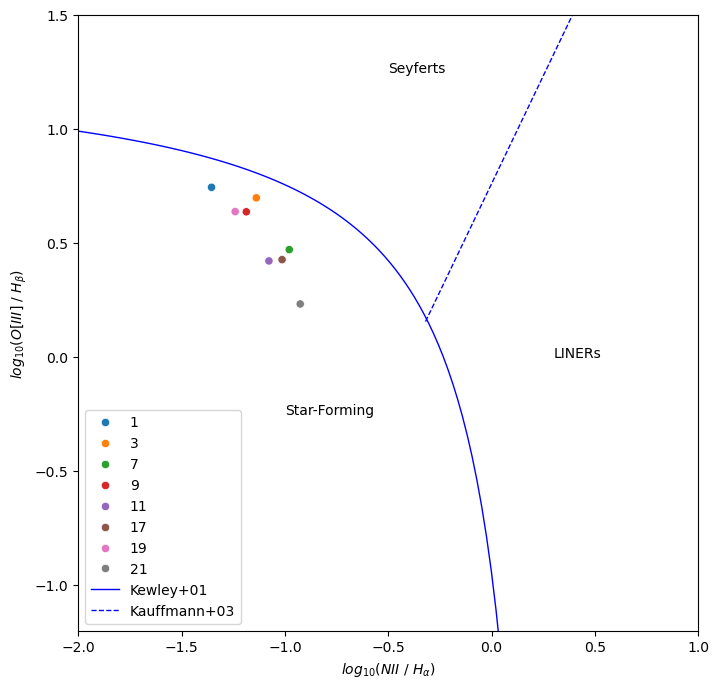

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=ratio_SII_Ha,y=ratio_OIII_Hb,hue=df['ID'])
plt.plot(log_SII_Ha,   log_OIII_Hb_SII_Kewley, '-' , color='blue', lw=1, label='Kewley+01')
plt.plot(log_SII_Ha_kewley, log_OIII_Hb_SII_Seyfert_LINER, '--', color='blue', lw=1, label='Kauffmann+03')
plt.ylim(-1.2,1.5)
plt.xlim(-2,1)
plt.text(s='Star-Forming', x=-1.0, y=-0.25, fontsize=10)
plt.text(s='Seyferts', x=-0.5, y=1.25, fontsize=10)
plt.text(s='LINERs', x=0.3, y=0, fontsize=10)
#plt.errorbar(x=ratio_NII_Ha,y=ratio_OIII_Hb)
plt.xlabel('$log_{10}$($NII$ / $ H_{\\alpha}$)')
plt.ylabel('$log_{10}$($O[III]$ / $ H_{\\beta}$)')
plt.legend()

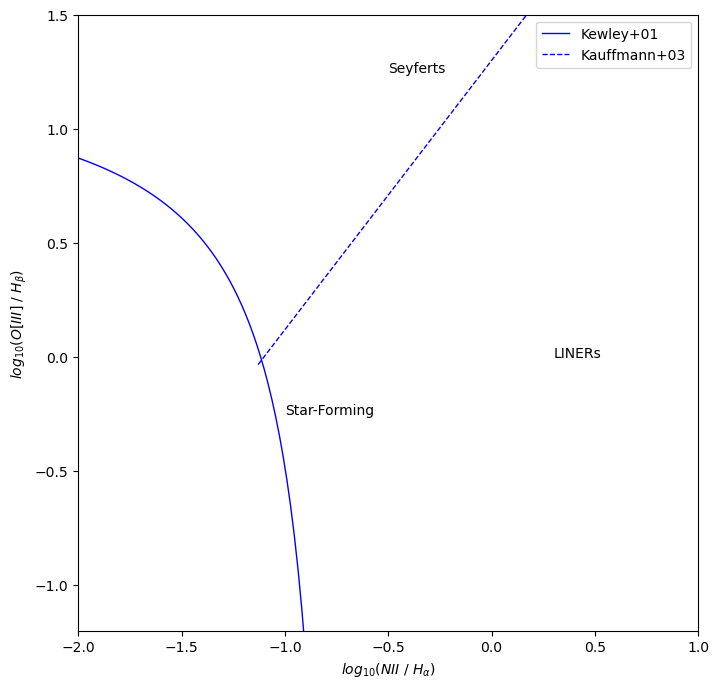

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=ratio_OI_Ha,y=ratio_OIII_Hb,hue=df['ID'])
plt.plot(log_OI_Ha,   log_OIII_Hb_SII_Kewley, '-' , color='blue', lw=1, label='Kewley+01')
plt.plot(log_OI_Ha_kewley06, log_OIII_Hb_OI_Seyfert_LINER, '--', color='blue', lw=1, label='Kauffmann+03')
plt.ylim(-1.2,1.5)
plt.xlim(-2,1)
plt.text(s='Star-Forming', x=-1.0, y=-0.25, fontsize=10)
plt.text(s='Seyferts', x=-0.5, y=1.25, fontsize=10)
plt.text(s='LINERs', x=0.3, y=0, fontsize=10)
#plt.errorbar(x=ratio_NII_Ha,y=ratio_OIII_Hb)
plt.xlabel('$log_{10}$($NII$ / $ H_{\\alpha}$)')
plt.ylabel('$log_{10}$($O[III]$ / $ H_{\\beta}$)')
plt.legend()